In [124]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [125]:
# sensitivity is p(positive|disease) which is the likelihood too
static_sensitivity = 0.95
static_likelihood = 0.95

# specificity is p(negative|no-disease)
static_specificity = 0.1

# prior is p(disease)
static_prior = 0.01

# 
static_evidence = 0.1085

<Axes: >

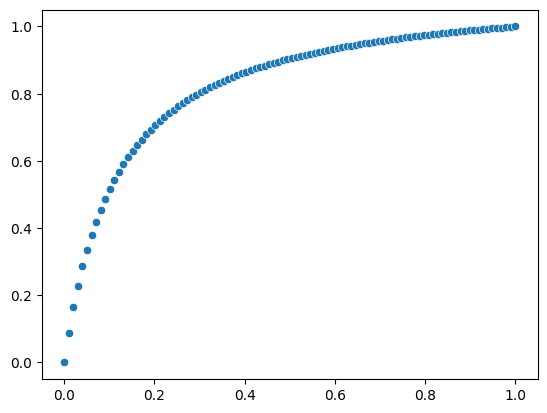

In [126]:
#### How posterior changes when prior changes ####

# define a gradually changing priors
priors = np.linspace(0,1,100)

# the prior affects the marginal evidence
joint_pd = static_sensitivity * priors
joint_pnd = static_specificity * (1-priors)
marginal_evidence = joint_pd + joint_pnd

# calculate the posterior with Bayes' rule
posteriors_change_priors = static_likelihood * priors / marginal_evidence

# TODO: plot it nicely
sns.scatterplot(x=priors, y=posteriors_change_priors)

<Axes: >

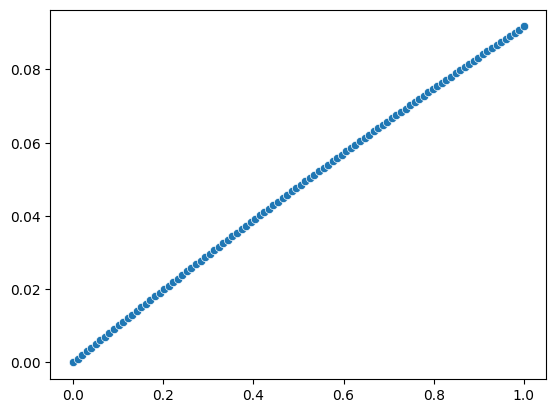

In [127]:
#### How posterior changes when sensitivity changes ####

sensitivities = np.linspace(0,1,100)

joint_pd = sensitivities * static_prior
joint_pnd = static_specificity * (1-static_prior)
marginal_evidence = joint_pd + joint_pnd

posteriors_change_sensitivity = sensitivities * static_prior / marginal_evidence

# TODO: plot it nicely
sns.scatterplot(x=sensitivities, y=posteriors_change_sensitivity)

<Axes: >

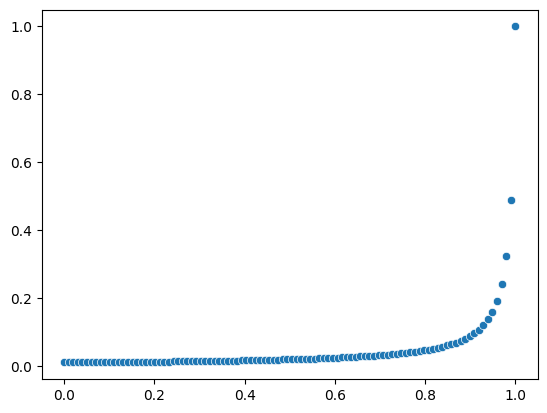

In [128]:
#### How posterior changes when specificity changes ####

specificities = np.linspace(0,1,100)

joint_pd = static_sensitivity * static_prior
joint_pnd = (1-specificities) * (1-static_prior)
marginal_evidence = joint_pd + joint_pnd

posteriors_change_specificity = static_sensitivity * static_prior / marginal_evidence

sns.scatterplot(x=specificities, y=posteriors_change_specificity)

/var/folders/wp/tzpzwlds5jv4zlz56mynt1500000gn/T/ipykernel_55030/4015744841.py:22: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  axes[0].legend()


Text(-90, 30, '(1.0000, 0.0917)')

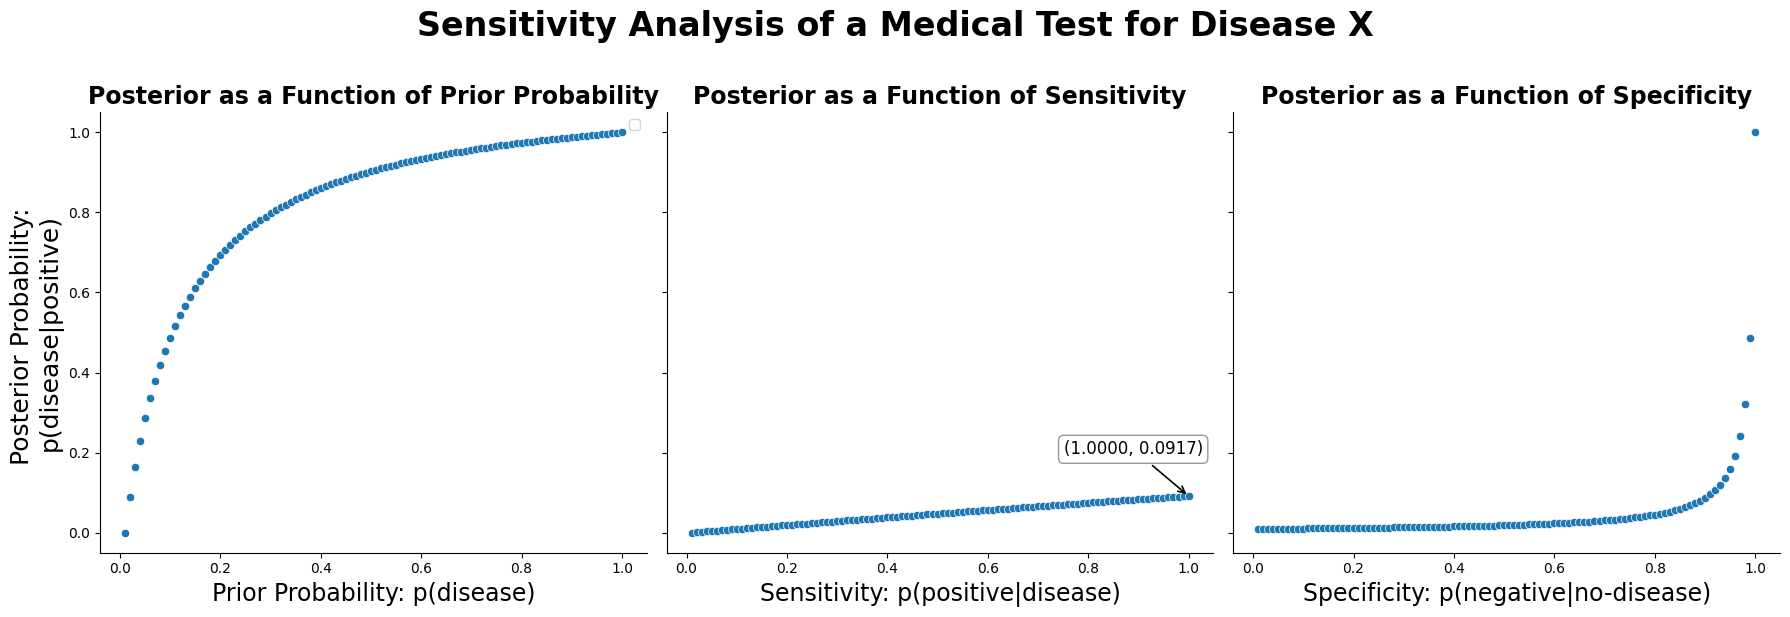

In [147]:
# have subplots that share y axis
fig, axes = plt.subplots(1, 3, figsize=(18, 6), sharey=True)

sns.scatterplot(x=priors, y=posteriors_change_priors, ax=axes[0])
axes[0].set_title("Posterior as a Function of Prior Probability", fontweight="bold", fontsize=17)
axes[0].set_ylabel("Posterior Probability: \np(disease|positive)", fontsize=18)
axes[0].set_xlabel("Prior Probability: p(disease)", fontsize=17)

sns.scatterplot(x=sensitivities, y=posteriors_change_sensitivity, ax=axes[1])
axes[1].set_title("Posterior as a Function of Sensitivity", fontweight="bold", fontsize=17)
# axes[1].set_ylabel("Posterior Probability: p(disease|positive)", fontsize=16)
axes[1].set_xlabel("Sensitivity: p(positive|disease)", fontsize=17)

sns.scatterplot(x=specificities, y=posteriors_change_specificity, ax=axes[2])
axes[2].set_title("Posterior as a Function of Specificity", fontweight="bold", fontsize=17)
# axes[2].set_ylabel("Posterior Probability: p(disease|positive)", fontsize=16)
axes[2].set_xlabel("Specificity: p(negative|no-disease)", fontsize=17)

fig.suptitle("Sensitivity Analysis of a Medical Test for Disease X", fontsize=24, fontweight="bold", y=1.02)
plt.tight_layout()

axes[0].legend()
for ax in axes:
    sns.despine(ax=ax)

# Get the last data point
x_last = sensitivities[-1]
y_last = posteriors_change_sensitivity[-1]

axes[1].annotate(
    f"({x_last:.4f}, {y_last:.4f})",   # make a label w/ coordinates
    xy=(x_last, y_last),                # point to point to
    xytext=(-90, 30),                  # offset for where the annotation should be
    textcoords="offset points",
    fontsize=12,
    arrowprops=dict(arrowstyle="->", color="black", lw=1.2),
    bbox=dict(boxstyle="round,pad=0.3", fc="white", ec="gray", alpha=0.8),
)

In [130]:
from mpl_toolkits.mplot3d import Axes3D

In [131]:
#### How posterior changes when prior AND sensitivity changes ####

# I changed to 0.01 so there's no division by zero warnings
priors = np.linspace(0.01,1,100)
sensitivities = np.linspace(0.01,1,100)

# create a mesh grid so every prior combines with every sensitivity
priors_grid, sen_grid = np.meshgrid(priors, sensitivities)

joint_pd = sen_grid * priors_grid
joint_pnd = static_specificity * (1-priors_grid)
marginal_evidence = joint_pd + joint_pnd

post_prior_sensitivity = sen_grid * priors_grid / marginal_evidence
post_prior_sensitivity.shape

(100, 100)

In [132]:
#### How posterior changes when prior AND specificity changes ####

# I changed to 0.01 so there's no division by zero warnings
priors = np.linspace(0.01,1,100)
specificities = np.linspace(0.01,1,100)

priors_grid, spec_grid = np.meshgrid(priors, specificities)

joint_pd = static_sensitivity * priors_grid
joint_pnd = spec_grid * (1-priors_grid)
marginal_evidence = joint_pd + joint_pnd

post_prior_specificity = static_sensitivity * priors_grid / marginal_evidence
post_prior_specificity.shape

(100, 100)

In [134]:
#### How posterior changes when sensitivity AND specificity changes ####

# I changed to 0.01 so there's no division by zero warnings
specificities = np.linspace(0.01,1,100)
sensitivities = np.linspace(0.01,1,100)

sen_grid, spec_grid = np.meshgrid(sensitivities, specificities)

joint_pd = sen_grid * static_prior
joint_pnd = (1-spec_grid) * (1-static_prior)
marginal_evidence = joint_pd + joint_pnd

post_sensitivity_specificity =  sen_grid * static_prior / marginal_evidence
post_sensitivity_specificity.shape

(100, 100)

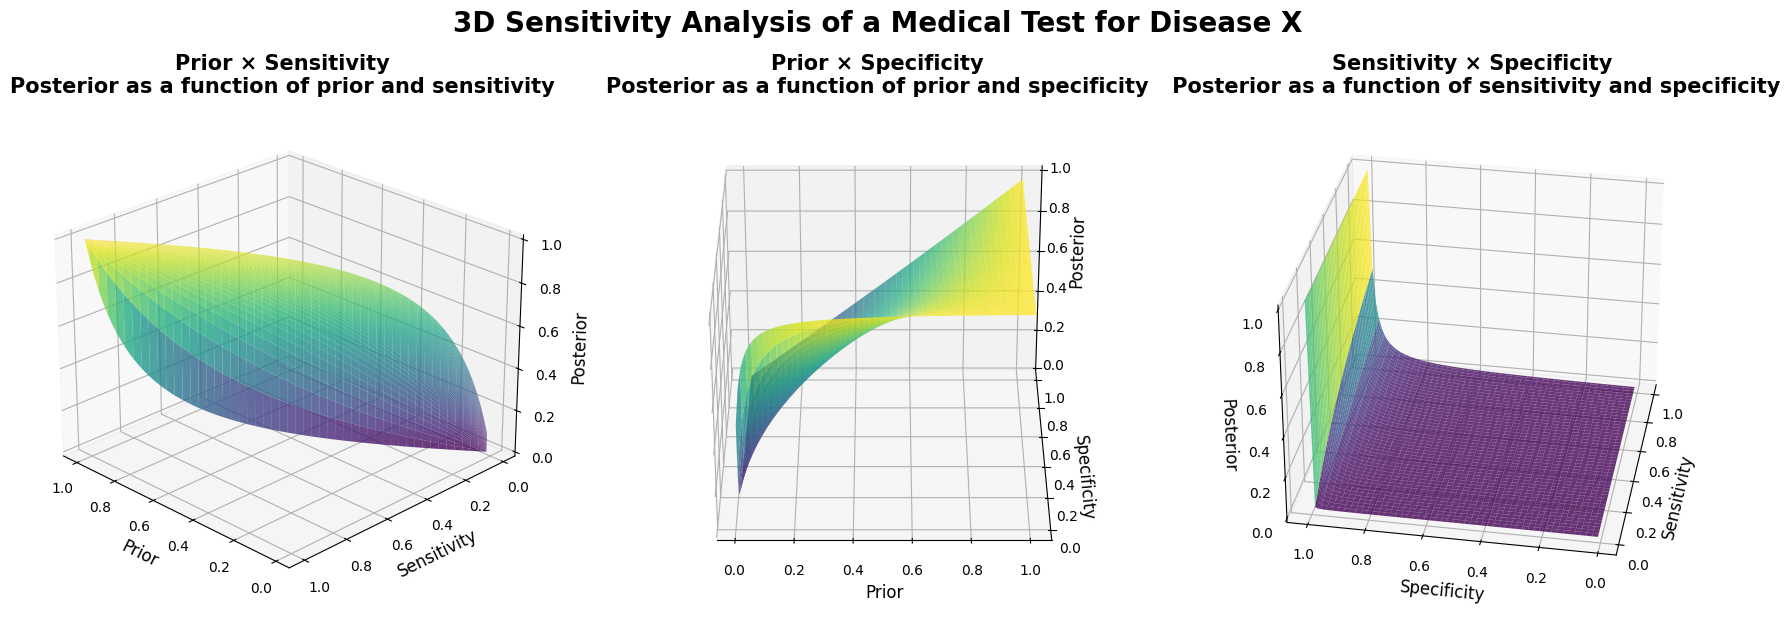

In [139]:
fig = plt.figure(figsize=(18, 6))

# --- Plot 1: Prior vs Sensitivity ---
ax1 = fig.add_subplot(1, 3, 1, projection='3d')

ax1.plot_surface(priors_grid, sen_grid, post_prior_sensitivity, cmap='viridis', alpha=0.8, edgecolor='none')
ax1.set_xlabel('Prior', fontsize=12)
ax1.set_ylabel('Sensitivity', fontsize=12)
ax1.set_zlabel('Posterior', fontsize=12)
ax1.set_title('Prior × Sensitivity\nPosterior as a function of prior and sensitivity', fontweight='bold', fontsize=15)

ax1.view_init(elev=25, azim=135)

# --- Plot 2: Prior vs Specificity ---
ax2 = fig.add_subplot(1, 3, 2, projection='3d')

ax2.plot_surface(priors_grid, spec_grid, post_prior_specificity, cmap='viridis', alpha=0.8, edgecolor='none')
ax2.set_xlabel('Prior', fontsize=12)
ax2.set_ylabel('Specificity', fontsize=12)
ax2.set_zlabel('Posterior', fontsize=12)
ax2.set_title('Prior × Specificity\nPosterior as a function of prior and specificity', fontweight='bold',fontsize=15)

ax2.view_init(elev=30, azim=270)

# --- Plot 3: Sensitivity vs Specificity ---
ax3 = fig.add_subplot(1, 3, 3, projection='3d')

ax3.plot_surface(sen_grid, spec_grid, post_sensitivity_specificity, cmap='viridis', alpha=0.8, edgecolor='none')
ax3.set_xlabel('Sensitivity', fontsize=12)
ax3.set_ylabel('Specificity', fontsize=12)
ax3.set_zlabel('Posterior', fontsize=12)
ax3.set_title('Sensitivity × Specificity\n Posterior as a function of sensitivity and specificity', fontweight='bold', fontsize=15)

ax3.view_init(elev=30, azim=190)

fig.suptitle('3D Sensitivity Analysis of a Medical Test for Disease X', fontsize=20, fontweight='bold', y=1.02)
plt.tight_layout()
plt.show()